## 6.Gun Tekrar
---
Yüzdelik dilimler, bir veri setindeki değerlerin belirli bir yüzdesinin altında kalan değeri belirler. Yani, veri setinin %p'sinin altında kalan değeri ifade eder. Örneğin, 25. yüzdelik dilim (Q1) veri setinin %25'inin altında kalan değeri gösterir. Yüzdelik dilimler genellikle sıralanmış veri seti üzerinde hesaplanır.

### Hesaplama Adımları

1. **Veri Setini Sırala:**
   - Veri setindeki değerleri küçükten büyüğe doğru sıralayın.

2. **Konum İndeksini Hesapla:**
   - İlgili yüzdelik dilim (p) için konum indeksini hesaplayın. Bu, veri setindeki değerlerin konumunu belirlemek için kullanılır.
   - Konum indeksi: \( k = (n - 1) \$\times$ p + 1 \)
     - \( n \): Veri setindeki toplam değer sayısı
     - \( p \): Yüzdelik dilim (0 ile 1 arasında bir değer)

3. **Interpolasyon (Gerekirse):**
   - Konum indeksi tam sayı değilse, iki en yakın değeri kullanarak interpolasyon yapın.

### Örnek Hesaplama

Veri seti: [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]

1. **Veri Setini Sırala:**
   - [1, 1, 2, 3, 3, 4, 5, 5, 6, 9]

2. **Konum İndeksini Hesapla:**
   - Örneğin, 25. yüzdelik dilim (Q1) için:
   - \( p = 0.25 \)
   - \( n = 10 \) (toplam değer sayısı)
   - \( k = (10 - 1) $\times$ 0.25 + 1 = 2.25 \)

3. **Interpolasyon:**
   - Konum indeksi 2.25 olduğundan, 2. ve 3. sıradaki değerler arasında interpolasyon yaparız.
   - 2. sıradaki değer: 1
   - 3. sıradaki değer: 2
   - Interpolasyon: \( 1 + 0.25 $\times$ (2 - 1) = 1.25 \)

Sonuç: 25. yüzdelik dilim (Q1) yaklaşık olarak 1.25'tir.

### Pandas ile Hesaplama

Pandas kullanarak yüzdelik dilimleri hesaplamak çok daha kolaydır çünkü yukarıdaki adımlar otomatik olarak gerçekleştirilir. İşte örnek:

```python
import pandas as pd

data = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
series = pd.Series(data)

q25 = series.quantile(0.25)
q50 = series.quantile(0.50)
q75 = series.quantile(0.75)

print("25. yüzdelik (Q1):", q25)
print("50. yüzdelik (Medyan):", q50)
print("75. yüzdelik (Q3):", q75)
```


## IQR aykiri veri ornegi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabet = load_diabetes()

df_diabet = pd.DataFrame(diabet.data)
df_diabet.columns = diabet.feature_names

df_diabet.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


df_diabet.shape

In [2]:
df_diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [3]:
Q1 = df_diabet.quantile(0.25)
Q1

age   -0.037299
sex   -0.044642
bmi   -0.034229
bp    -0.036656
s1    -0.034248
s2    -0.030358
s3    -0.035117
s4    -0.039493
s5    -0.033246
s6    -0.033179
Name: 0.25, dtype: float64

In [4]:
Q3 = df_diabet.quantile(0.75)
Q3

age    0.038076
sex    0.050680
bmi    0.031248
bp     0.035644
s1     0.028358
s2     0.029844
s3     0.029312
s4     0.034309
s5     0.032432
s6     0.027917
Name: 0.75, dtype: float64

In [5]:
IQR = Q3 - Q1
IQR

age    0.075375
sex    0.095322
bmi    0.065477
bp     0.072300
s1     0.062606
s2     0.060203
s3     0.064429
s4     0.073802
s5     0.065678
s6     0.061096
dtype: float64

In [6]:
L = Q1 - 1.5*IQR
U = Q3 + 1.5*IQR

print(f"Kabul edilebilir en dusuk deger : {L}")
print(f"Kabul edilebilir en buyuk deger : {U}")

Kabul edilebilir en dusuk deger : age   -0.150362
sex   -0.187624
bmi   -0.132445
bp    -0.145106
s1    -0.128157
s2    -0.120663
s3    -0.131760
s4    -0.150197
s5    -0.131762
s6    -0.124823
dtype: float64
Kabul edilebilir en buyuk deger : age    0.151139
sex    0.193663
bmi    0.129464
bp     0.144094
s1     0.122267
s2     0.120149
s3     0.125954
s4     0.145012
s5     0.130949
s6     0.119561
dtype: float64


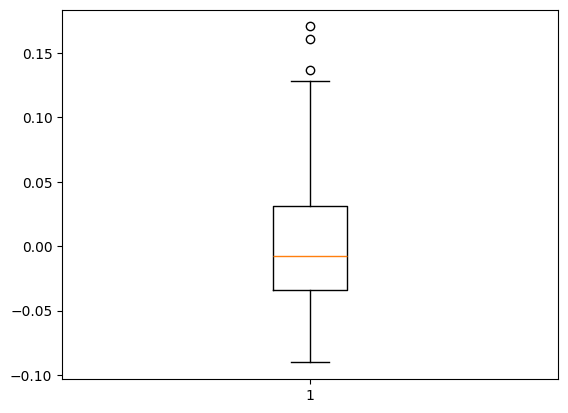

bmi maksimum kabul edilebilir deger : 0.1294636406639386
bmi minumum kabul edilebilir deger : -0.13244469328909578


In [7]:
plt.boxplot(df_diabet.bmi)
plt.show()
print(f"bmi maksimum kabul edilebilir deger : {U.bmi}")
print(f"bmi minumum kabul edilebilir deger : {L.bmi}")

In [8]:
df_diabet[df_diabet.bmi > U.bmi]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071019,0.048628
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059


In [17]:
# Aykiri veriler filtrelenir
temiz_data = df_diabet[(df_diabet.bmi <= U.bmi) & (df_diabet.bmi >= L.bmi) ] 
print(temiz_data.shape)

(439, 10)


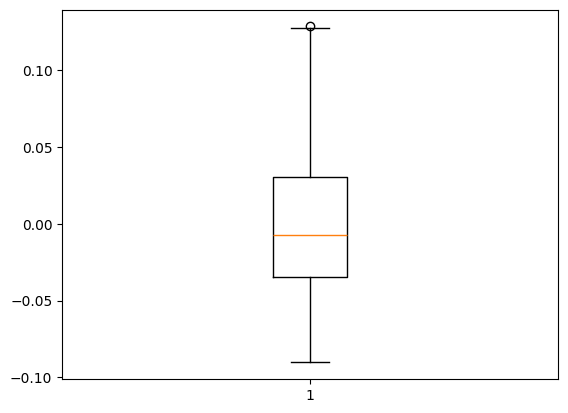

In [20]:
#plt.figure(figsize=(10,7))
plt.boxplot(temiz_data.bmi)
plt.show()

## Z-Skoru ve IQR Yöntemlerinin Uygulanması

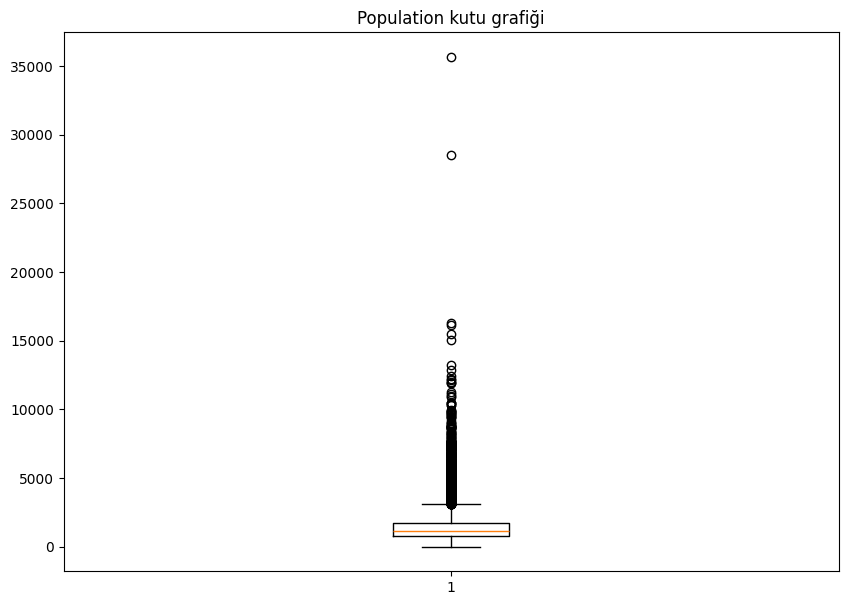

Z-skoru ile tespit ve filtreleme:
0        0.974429
1        0.861439
2        0.820777
3        0.766028
4        0.759847
           ...   
20635    0.512592
20636    0.944405
20637    0.369537
20638    0.604429
20639    0.033977
Name: Population, Length: 20640, dtype: float64
Z-skor öncesi: (20640, 8)
Z-skor ile filtreleme sonrası: (19884, 8)
IQR ile tespit ve filtreleme:
IQR Öncesi Shape: (20640, 8)
IQR: 938.0
Lower: -620.0 ve Upper: 3132.0
IQR Sonrası Shape (19442, 8)


In [21]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
housing = fetch_california_housing()
sutun_isimleri = housing.feature_names
df_housing = pd.DataFrame(housing.data)
df_housing.columns = sutun_isimleri
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df_housing['Population'])
plt.title("Population kutu grafiği")
plt.show()
print("Z-skoru ile tespit ve filtreleme:")
z_degerleri = np.abs(stats.zscore(df_housing['Population']))
print(z_degerleri)
threshold_z_skor = 2
outlier_indisler = np.where(z_degerleri > threshold_z_skor)[0]
outlier_filtrelendi = df_housing.drop(outlier_indisler)
print("Z-skor öncesi:", df_housing.shape)
print("Z-skor ile filtreleme sonrası:", outlier_filtrelendi.shape)
print("IQR ile tespit ve filtreleme:")
print("IQR Öncesi Shape:", df_housing.shape)
Q1 = df_housing['Population'].quantile(0.25)
Q3 = df_housing['Population'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:",IQR)
L = Q1 - 1.5*IQR
U = Q3 + 1.5*IQR
print("Lower: {0} ve Upper: {1}".format(L,U) )
Upper_dizisi = np.where(df_housing['Population'] >= U)[0]
Lower_dizisi = np.where(df_housing['Population'] <= L)[0]
df_housing.drop(index=Upper_dizisi, inplace=True)
df_housing.drop(index=Lower_dizisi, inplace=True)
print("IQR Sonrası Shape", df_housing.shape)